In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('car_data (1).csv')

In [61]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [62]:
df['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [63]:
# label encode gender
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


In [64]:
df['Age'] = pd.cut(df['Age'], bins=3, labels=[0, 1, 2])

df['AnnualSalary'] = pd.cut(df['AnnualSalary'], bins=2, labels=[0, 1])

In [65]:
df.drop(['User ID'], axis=1, inplace=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

hyperparameters = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1,6), 'criterion': ['gini', 'entropy']}, cv=5)

hyperparameters.fit(X_train, y_train)

print(hyperparameters.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [67]:
nb = DecisionTreeClassifier(criterion=hyperparameters.best_params_['criterion'], max_depth=hyperparameters.best_params_['max_depth'])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


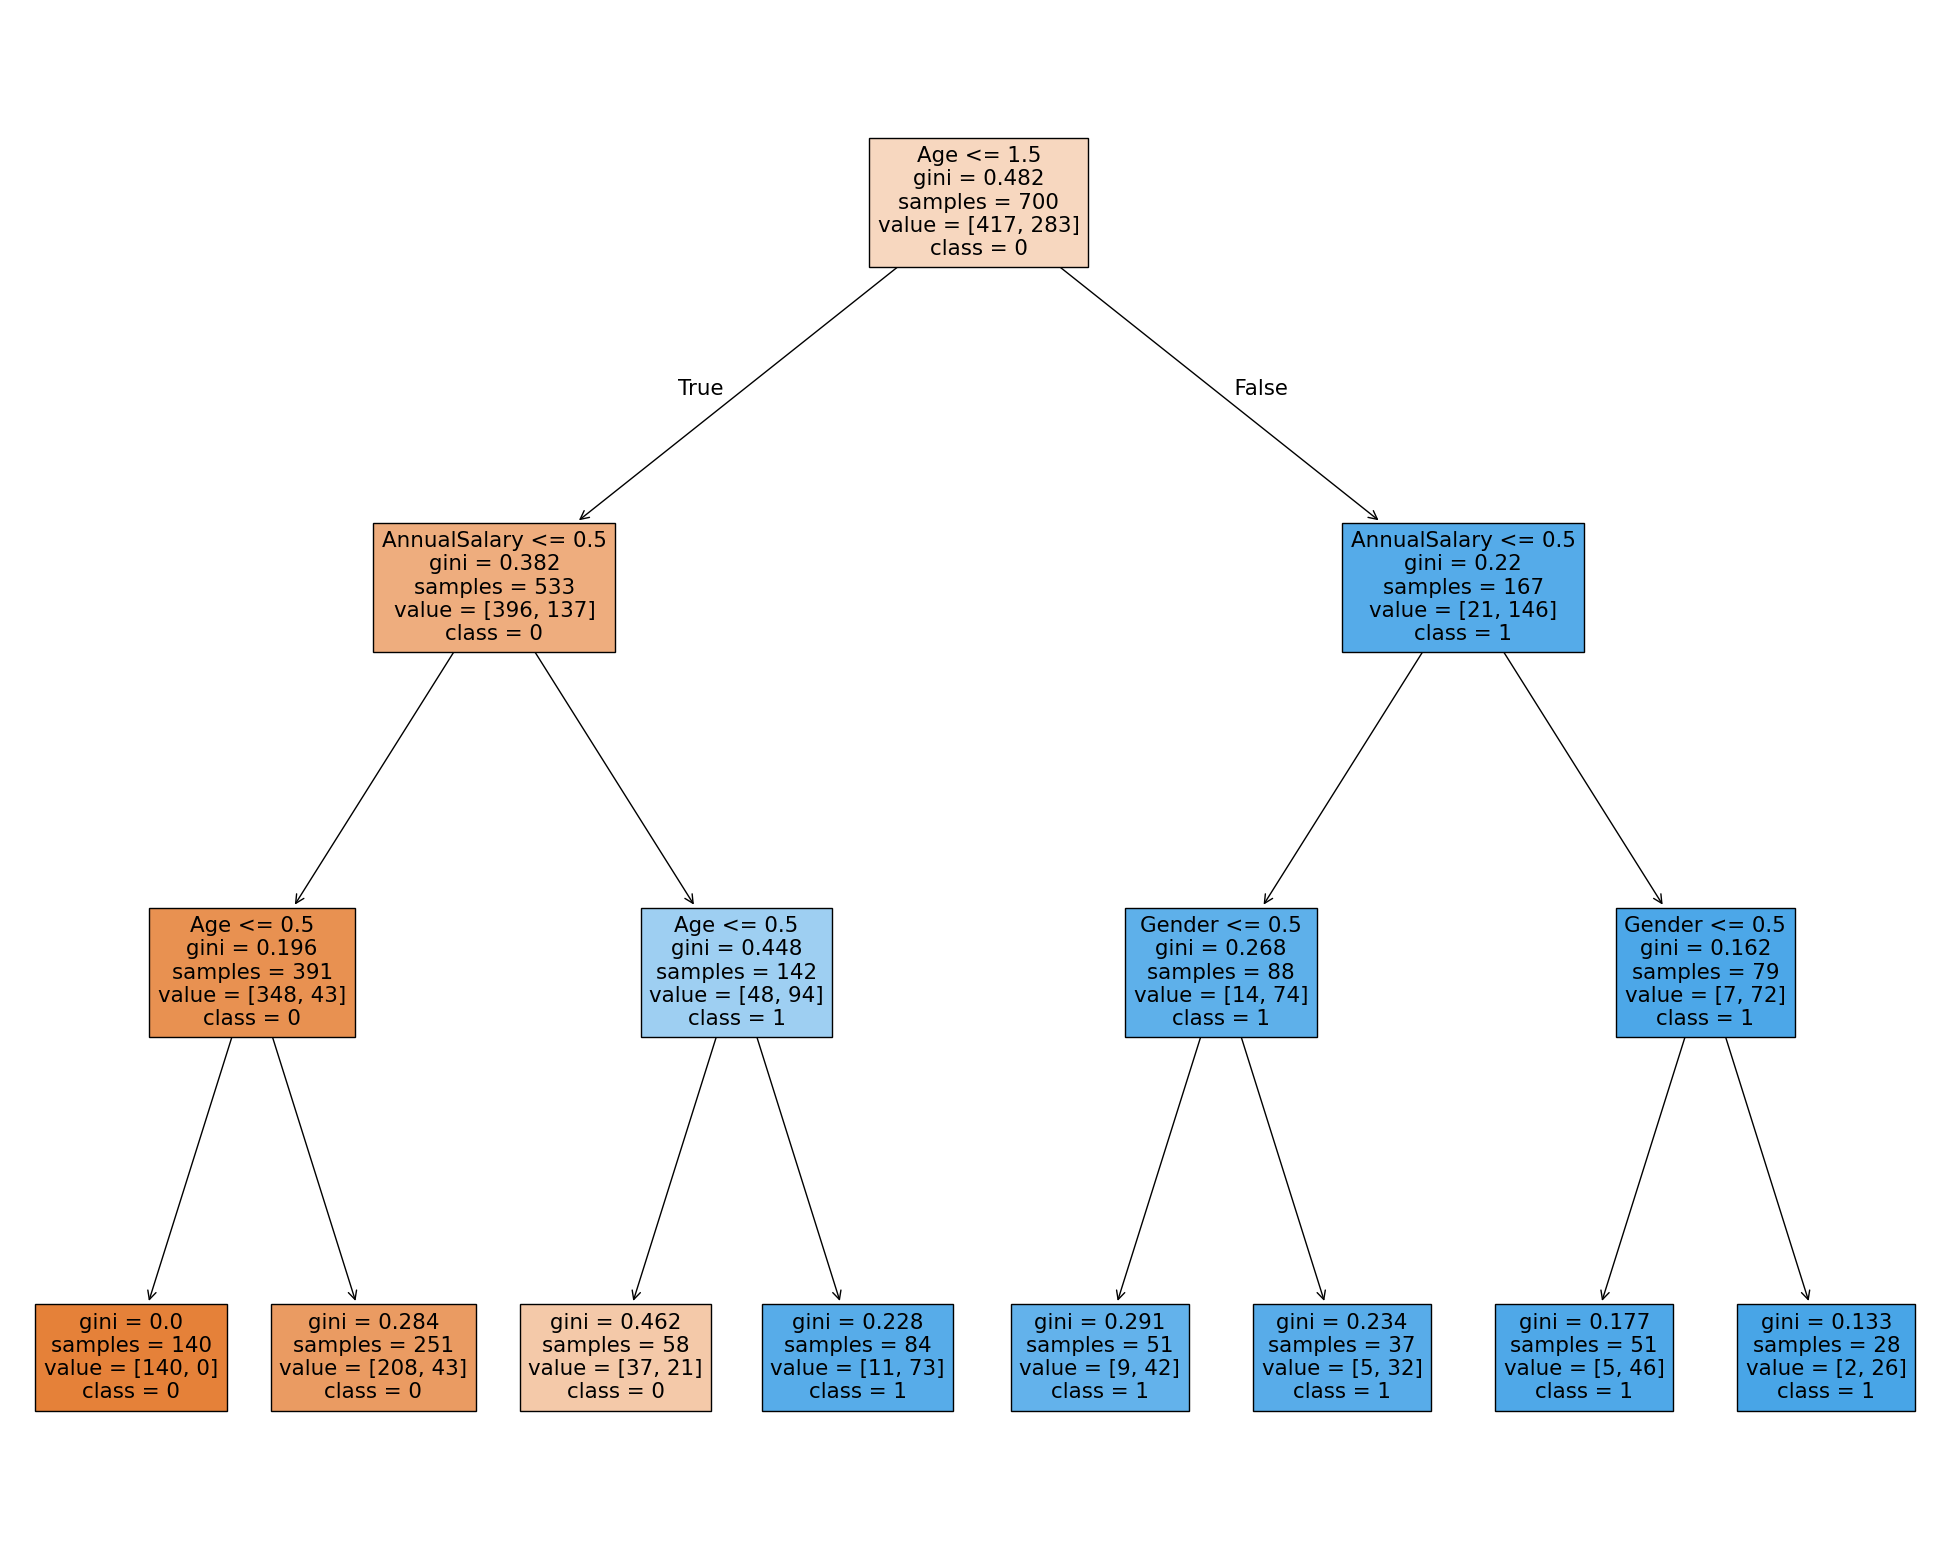

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))

_ = plot_tree(nb, 
              feature_names=X.columns,  
              class_names=['0', '1'],
              filled=True)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87
